# Email Spam
The data for this example consists of information from 4601 email messages, in a study to try to predict whether the email was junk email, or “spam.” The objective was to design an automatic spam detector that could filter out spam before clogging the users’ mailboxes. For all 4601 email messages, the true outcome (email type) email or spam is available, along with the relative frequencies of 57 of the most commonly occurring words and punctuation marks in the email message. This is a supervised
learning problem, with the outcome the class variable email/spam. It is also called a classification problem.

For this problem not all errors are equal; we want to avoid filtering out good email, while letting spam get through is not desirable but less serious in its consequences. We discuss a number of different methods for tackling this learning problem in the book.

Variables:

|                          |                                                                                 |
|--------------------------|---------------------------------------------------------------------------------|
|test                      |denotes wheter the record is train (0) or test(1)    |
|word_freq_WORD            |percentage of words in the e-mail that match WORD <br>continuous real [0,100]    |
|char_freq_CHAR            |percentage of characters in the e-mail that match CHAR<br>continuous real [0,100]|
|capital_run_length_average|average length of uninterrupted sequences of capital letters<br>continuous real [1,...]|
|capital_run_length_longest|length of longest uninterrupted sequence of capital letters<br>continuous integer [1,...]|
|capital_run_length_total  |sum of length of uninterrupted sequences of capital letters<br>continuous integer [1,...]|
|spam                      |denotes whether the e-mail was considered spam (1) or not (0),<br>i.e. unsolicited commercial e-mail|

## Load and Prepare Data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("../data/Spam.txt")
target = ['spam']
features = ['word_freq_make', 'word_freq_address', 'word_freq_all',
            'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove',
            'word_freq_internet', 'word_freq_order', 'word_freq_mail',
            'word_freq_receive', 'word_freq_will', 'word_freq_people',
            'word_freq_report', 'word_freq_addresses', 'word_freq_free',
            'word_freq_business', 'word_freq_email', 'word_freq_you',
            'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
            'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
            'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
            'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
            'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
            'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
            'word_freq_original', 'word_freq_project', 'word_freq_re',
            'word_freq_edu', 'word_freq_table', 'word_freq_conference',
            'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
            'char_freq_$', 'char_freq_#', 'capital_run_length_average',
            'capital_run_length_longest', 'capital_run_length_total']
X, y = df[features].values, df[target].values

# split by test column value
is_test = df.test.values
X_train, X_test = X[is_test==0], X[is_test==1]
y_train, y_test = y[is_test==0], y[is_test==1]
# flatten y for future use
y_train_flat = np.squeeze(y_train)
y_test_flat =  np.squeeze(y_test)

## Logistic Regression

In [3]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

C:\Python64\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
# PAGE 301. By comparison, a linear logistic regression has a test error rate of 7.6%.
ls = sm.Logit(y_train, sm.add_constant(X_train)).fit(disp=False)
lr_error_rate = 1-accuracy_score(y_test, np.round(ls.predict(sm.add_constant(X_test))))
print(f'Logistic Regression Test Error Rate: {lr_error_rate*100:.1f}%')

Logistic Regression Test Error Rate: 7.6%


## Additive Logistic Regression

In [5]:
from pygam import LogisticGAM

In [148]:
lam = [0.6] * X_train.shape[1]
lam[ 0]=    1000000
lam[ 1]=     500
lam[ 2]=    500
lam[ 3]=      0.1
lam[ 4]=    5000
lam[ 5]=    164.53
lam[ 6]=     41.65
lam[ 7]=     40
lam[ 8]=    80
lam[ 9]=    164.53
lam[10]=    164.53
lam[11]=    328.37
lam[12]=    164.53
lam[13]=     82.61
lam[14]=     41.65
lam[15]=    164.53
lam[16]=     82.61
lam[17]=    164.53
lam[18]=    328.37
lam[19]=     41.65
lam[20]=    328.37
lam[21]=     10.93
lam[22]=     21.17
lam[23]=     41.65
lam[24]=     21.17
lam[25]=     10.93
lam[26]=      0.70
lam[27]=     10.93
lam[28]=      0.70
lam[29]=     10.93
lam[30]=      3.25
lam[31]=      0.70
lam[32]=     21.17
lam[33]=      0.1
lam[34]=      5.81
lam[35]=     41.65
lam[36]=     82.61
lam[37]=      1.97
lam[38]=     10.93
lam[39]=     82.61
lam[40]=      0.01
lam[41]=      0.85
lam[42]=     1
lam[43]=      5.81
lam[44]=     82.61
lam[45]=     10.93
lam[46]=      1
lam[47]=      1
lam[48]=     82.61
lam[49]=     82.61
lam[50]=     21.17
lam[51]=    164.53
lam[52]=     1
lam[53]=     0.1
lam[54]=     10
lam[55]=    0.01
lam[56]=    0.01

In [149]:
X_train_log = np.log(X_train+0.1)
X_test_log = np.log(X_test+0.1)
gam = LogisticGAM(lam=lam).fit(X_train_log, y_train)

C:\Python64\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Python64\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Python64\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


In [150]:
1 - gam.accuracy(X_test_log, y_test)

0.052734375

In [151]:
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                    135.7863
Link Function:                        LogitLink Log Likelihood:                                  -334.1199
Number of Samples:                         3065 AIC:                                              939.8124
                                                AICc:                                             952.6897
                                                UBRE:                                               2.3421
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.8378
Feature Function                  Lam

C:\Python64\lib\site-packages\ipykernel\__main__.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  if __name__ == '__main__':


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from pygam import LogisticGAM
from sklearn.metrics import accuracy_score
from sklearn import tree
import pydotplus
import collections
from IPython.display import Image, display

%matplotlib inline

import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

C:\Python64\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv("../data/Spam.txt")
df.head()

,test,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,1,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
predictors = ['word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_free', 
              'word_freq_business', 'word_freq_hpl', 'word_freq_hp', 'word_freq_george', 'word_freq_1999',
              'word_freq_re', 'word_freq_edu', 'char_freq_!', 'char_freq_$', 
              'capital_run_length_longest', 'capital_run_length_total']
X = df[predictors].values
y = df['spam'].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=3065, random_state=30)

C:\Python64\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [5]:
ls = sm.Logit(y_train, sm.add_constant(X_train)).fit(disp=False)
r = 1-accuracy_score(y_train, np.round(ls.predict(sm.add_constant(X_train))))
print('Training error', r)
r = 1-accuracy_score(y_test, np.round(ls.predict(sm.add_constant(X_test))))
print('Test error', r)

Training error 0.08678629690048945
Test error 0.08919270833333337


In [6]:
X_train_log = np.log(X_train+0.1)
X_test_log = np.log(X_test+0.1)
gam = LogisticGAM(lam=[400, 20, 5.5, 7, 14, 3, 1, 1, 0.08, 2, 1, 1, 8, 1, 4, 3]).fit(X_train_log, y_train)

In [7]:
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     64.2218
Link Function:                        LogitLink Log Likelihood:                                  -437.4299
Number of Samples:                         3065 AIC:                                             1003.3033
                                                AICc:                                            1006.1839
                                                UBRE:                                               2.3441
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.7879
Feature Function                  Lam

C:\Python64\lib\site-packages\ipykernel\__main__.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  if __name__ == '__main__':


In [8]:
print('Training error', 1-gam.accuracy(X_train_log, y_train))
print('Test error', 1-gam.accuracy(X_test_log, y_test))

Training error 0.04893964110929849
Test error 0.064453125


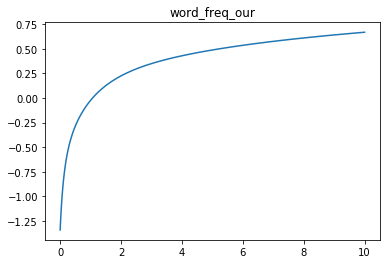

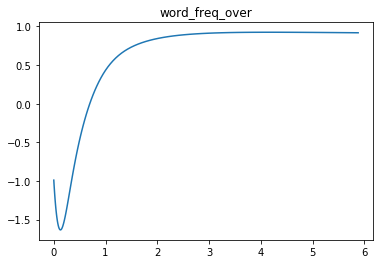

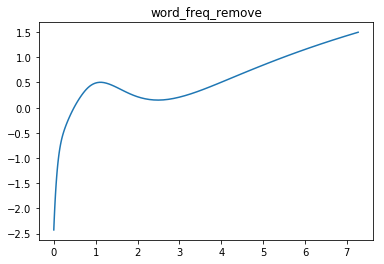

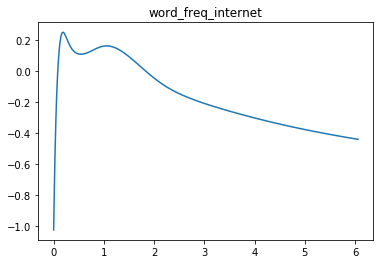

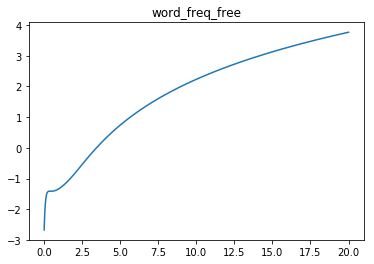

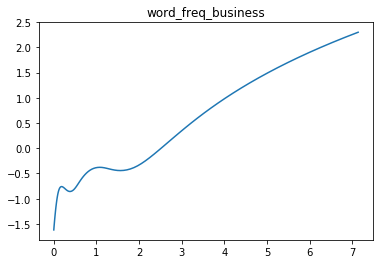

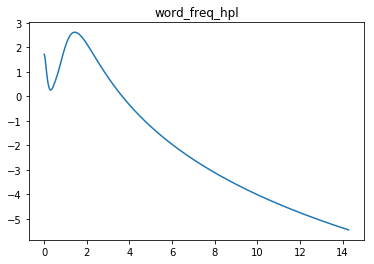

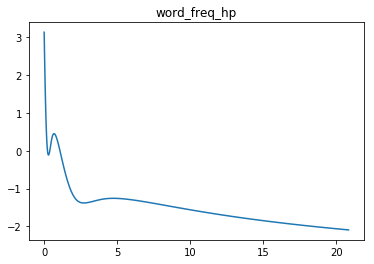

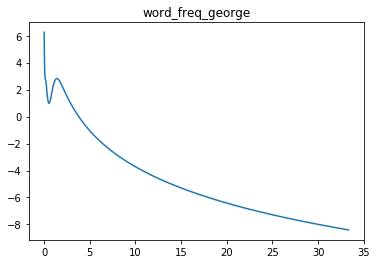

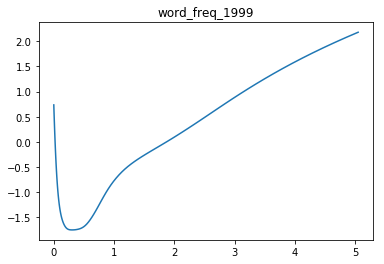

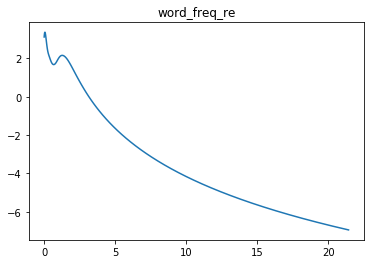

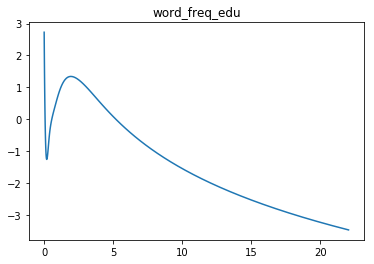

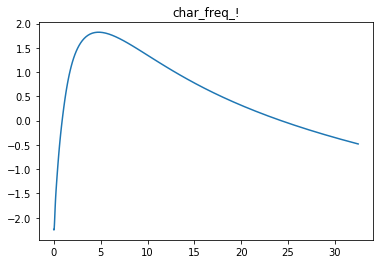

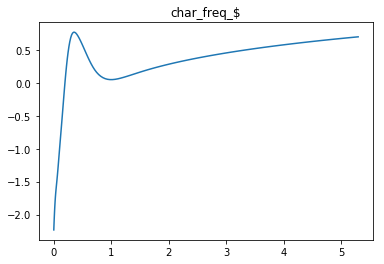

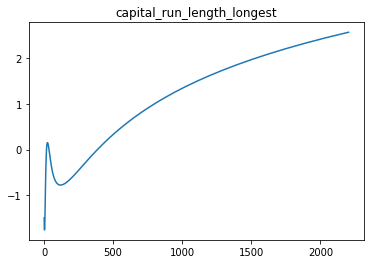

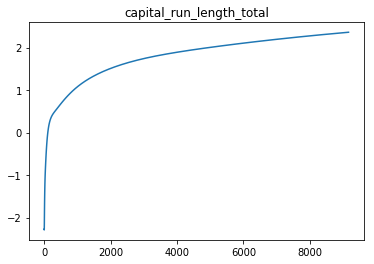

In [9]:
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)
    plt.figure()
    plt.plot(np.exp(XX[:, term.feature])-0.1, pdep)
    plt.title(predictors[i])
    plt.show()

In [10]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=17)
clf.fit(X_train, y_train)
y_test_hat = clf.predict(X_test)

In [11]:
1 - accuracy_score(y_test, y_test_hat)

0.09895833333333337

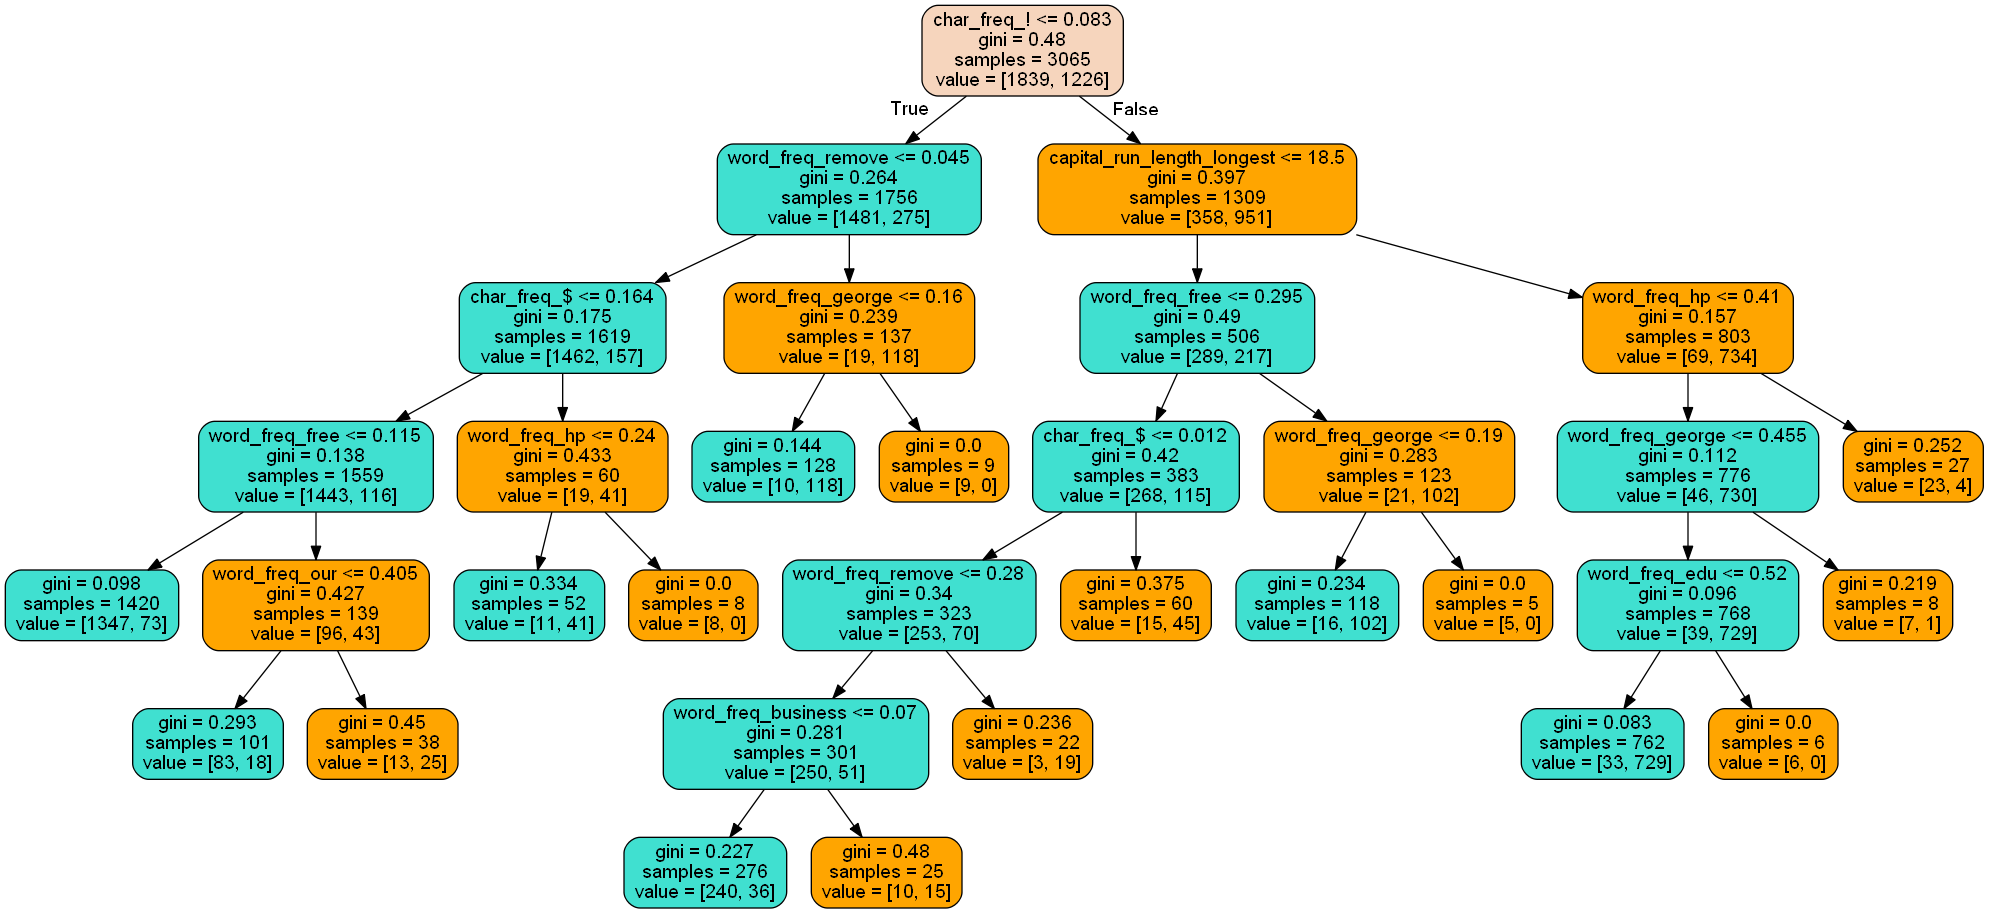

In [12]:
dot_data = tree.export_graphviz(clf,
                                feature_names=predictors,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

display(Image(graph.create_png()))

In [92]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from mpl_toolkits.mplot3d import Axes3D

In [107]:
#X = np.log(df.values[:,:-1]+0.1)
X = df.values[:,:-1]
y = df['spam'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=3065, random_state=70)

C:\Python64\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [128]:
gbt = GradientBoostingClassifier(n_estimators=500, max_depth=2)
gbt = gbt.fit(X_train, y_train)
y_test_hat = gbt.predict(X_test)

In [129]:
1 - accuracy_score(y_test, y_test_hat)

0.048828125

In [130]:
#list(zip(range(len(df.columns)), df.columns))

In [131]:
sorted(list(zip(gbt.feature_importances_, df.columns[:-1])))

[(0.0, 'word_freq_415'),
 (0.0, 'word_freq_857'),
 (0.0, 'word_freq_addresses'),
 (0.0, 'word_freq_table'),
 (0.0, 'word_freq_telnet'),
 (0.0011325109575670113, 'word_freq_85'),
 (0.002179137543590785, 'word_freq_make'),
 (0.00234987137293521, 'word_freq_cs'),
 (0.002352950278164774, 'word_freq_direct'),
 (0.0027393100191102694, 'word_freq_lab'),
 (0.0037555751352333403, 'word_freq_hpl'),
 (0.003956675188995516, 'word_freq_labs'),
 (0.004387617258324066, 'word_freq_original'),
 (0.004967554722645783, 'word_freq_project'),
 (0.0052070470308764535, 'word_freq_address'),
 (0.0054540929164152065, 'word_freq_3d'),
 (0.0058236651259227145, 'char_freq_['),
 (0.006457025819769674, 'char_freq_#'),
 (0.007588495373049742, 'word_freq_pm'),
 (0.00779331572984286, 'word_freq_report'),
 (0.007823943909867497, 'word_freq_parts'),
 (0.009004735981241815, 'word_freq_people'),
 (0.009551867470160317, 'word_freq_data'),
 (0.010217072640652242, 'word_freq_conference'),
 (0.010670135165360388, 'word_freq_0

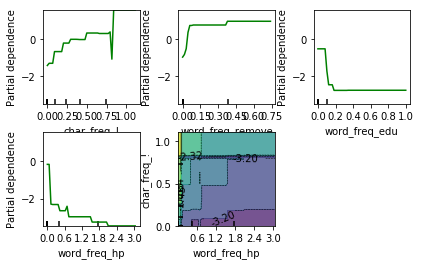

In [132]:
features = [51, 6, 45, 24, (24, 51)]
fig, axs = plot_partial_dependence(gbt, X_train, features,
                                       feature_names=df.columns,
                                       n_jobs=3, grid_resolution=50)
plt.subplots_adjust(top=0.9)

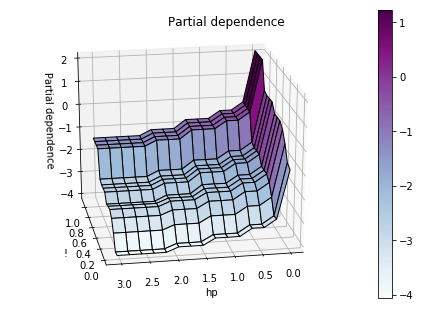

In [133]:
fig = plt.figure()

target_feature = (24, 51)
pdp, axes = partial_dependence(gbt, target_feature, X=X_train, grid_resolution=15)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].reshape(list(map(np.size, axes))).T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.BuPu, edgecolor='k')
ax.set_xlabel('hp')
ax.set_ylabel('!')
ax.set_zlabel('Partial dependence')
ax.invert_yaxis()
ax.view_init(elev=22, azim=80)
plt.colorbar(surf)
plt.suptitle('Partial dependence')
plt.subplots_adjust(top=0.9)
plt.show()